In [24]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("googleplaystore.csv")

# Drop duplicates
df.drop_duplicates(inplace=True)

# Remove rows with missing 'App' or 'Category'
df.dropna(subset=['App', 'Category'], inplace=True)

# Remove rows where 'Rating' is greater than 5
df = df[df['Rating'] <= 5]

# Clean 'Installs' column (remove '+' and ',' then convert to int)
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True).astype(float)

# Clean 'Price' column
if df['Price'].dtype == 'object':
    df['Price'] = df['Price'].str.replace('$', '', regex=False)

# Convert to float
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

def clean_size(value):
    if isinstance(value, float) or pd.isnull(value):
        return np.nan
    if value == 'Varies with device':
        return np.nan
    if 'M' in value:
        return float(value.replace('M', '').replace(',', '')) * 1024  # MB to KB
    elif 'k' in value:
        return float(value.replace('k', '').replace(',', ''))
    else:
        return np.nan

df['Size'] = df['Size'].apply(clean_size)
df['Size'] = df['Size'].fillna(df['Size'].median())  # ✅ this is the safe way



In [25]:
# Convert 'Reviews' to numeric
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Convert 'Last Updated' to datetime
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

# Convert 'Category' and 'Content Rating' to category type
df['Category'] = df['Category'].astype('category')
df['Content Rating'] = df['Content Rating'].astype('category')


In [26]:
# Load the second dataset
regional_df = pd.read_csv("googleplaystore_user_reviews.csv")

# Merge on 'App'
merged_df = pd.merge(df, regional_df, on="App", how="left")

# Save merged dataset
merged_df.to_csv("merged_googleplaystore.csv", index=False)


In [27]:
merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN


In [28]:
import os
print(os.listdir())


[' playstoreanalytics.ipynb', '.cache', '.eclipse', '.idlerc', '.ipynb_checkpoints', '.ipython', '.jupyter', '.matplotlib', '.p2', '.spyder-py3', '.vscode', 'Analysis.ipynb', 'AppData', 'Application Data', 'Contacts', 'Cookies', 'Desktop', 'Documents', 'Downloads', 'eclipse', 'eclipse-workspace', 'ex1.java', 'Favorites', 'google playstore', 'googleplaystore.csv', 'googleplaystoreanalytics.csv', 'googleplaystoreanalytics.ipynb', 'googleplaystore_user_reviews.csv', 'google_playstore.csv', 'google_playstore_analytics.csv', 'google_playstore_reviews.csv', 'google_play_dashboard.html', 'google_play_store.csv', 'import java.util.java', 'index.html', 'IntelGraphicsProfiles', 'Jedi', 'json_data', 'json_outputs', 'Links', 'Local Settings', 'logs', 'merged_googleplaystore.csv', 'Microsoft', 'Music', 'My Documents', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{d5156024-f7ff-11ef-a98b-8dfb1553a2e0}.TM.blf', 'NTUSER.DAT{d5156024-f7ff-11ef-a98b-8dfb1553a2e0}.TMContainer

In [32]:
html_files_path="./"
if not os.path.exists(html_files_path):
    os.makedirs(html_files_path)

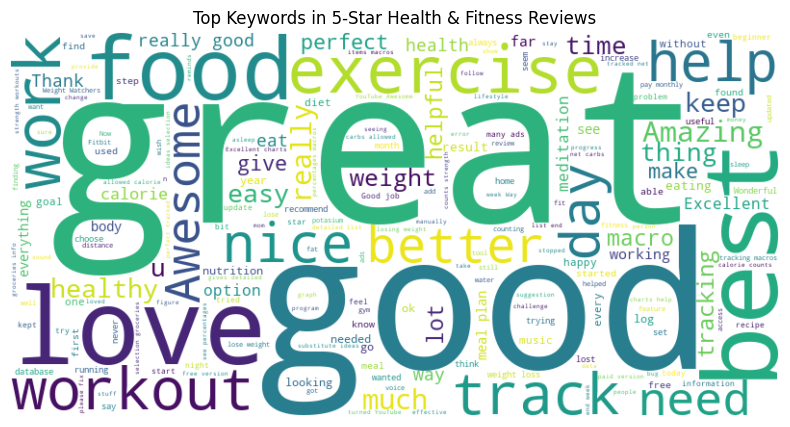

In [30]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Load data
reviews_df = pd.read_csv('googleplaystore_user_reviews.csv')
apps_df = pd.read_csv('googleplaystore.csv')

# Filter for Health & Fitness apps
health_apps = apps_df[apps_df['Category'] == 'HEALTH_AND_FITNESS']['App'].unique()

# Filter reviews
health_reviews = reviews_df[
    (reviews_df['App'].isin(health_apps)) & 
    (reviews_df['Sentiment'] == 'Positive') & 
    (reviews_df['Sentiment_Polarity'] >= 0.5)
]

# Generate word cloud
stopwords = set(STOPWORDS)
custom_stopwords = {'app', 'application', 'google', 'play', 'store', 'use', 'using'}
stopwords.update(custom_stopwords)

text = ' '.join(health_reviews['Translated_Review'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Keywords in 5-Star Health & Fitness Reviews')
plt.show()

In [33]:
from wordcloud import WordCloud
import plotly.graph_objects as go
from pathlib import Path

# ... [your data loading and filtering code] ...

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                     stopwords=stopwords).generate(text)

# Convert to Plotly
fig = go.Figure()
fig.add_trace(go.Image(z=wordcloud.to_array()))

# Customize layout
fig.update_layout(
    title="Top Keywords in 5-Star Health & Fitness Reviews",
    xaxis={'showgrid': False, 'showticklabels': False},
    yaxis={'showgrid': False, 'showticklabels': False}
)

# Create output directory
output_dir = Path("output")
output_dir.mkdir(exist_ok=True)

# Save as interactive HTML
html_path = output_dir / "interactive_wordcloud.html"
fig.write_html(html_path)

print(f"Interactive word cloud saved to {html_path}")

Interactive word cloud saved to output\interactive_wordcloud.html


In [34]:
pip install pandas plotly


In [37]:
import pandas as pd
import plotly.graph_objects as go
from datetime import datetime, timedelta
import os

def is_between_3pm_5pm_ist():
    now_utc = datetime.utcnow()
    ist_now = now_utc + timedelta(hours=5, minutes=30)
    return 15 <= ist_now.hour < 17  # Between 3PM and 5PM IST

def clean_size(size_str):
    if pd.isna(size_str) or size_str == 'Varies with device':
        return pd.NA
    try:
        if 'M' in size_str:
            return float(size_str.replace('M', '')) * 1  # In MB
        elif 'k' in size_str:
            return float(size_str.replace('k', '')) / 1024  # Convert KB to MB
    except:
        return pd.NA
    return pd.NA

def load_and_clean_data():
    df = pd.read_csv('googleplaystore.csv')

    # Clean Installs
    df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True).replace('Varies with device', pd.NA)
    df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

    # Clean Size
    df['Size'] = df['Size'].apply(clean_size)
    df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

    # Clean Rating & Reviews
    df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
    df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

    # Clean Date
    df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

    # Drop rows with NA in important fields
    df.dropna(subset=['Installs', 'Rating', 'Reviews', 'Size', 'Last Updated', 'Category'], inplace=True)
    
    return df

def create_grouped_bar_chart(df):
    filtered = df[
        (df['Rating'] >= 4.0) &
        (df['Size'] >= 10) &
        (df['Last Updated'].dt.month == 1)
    ]

    if filtered.empty:
        print("No data matching filters.")
        return

    # Top 10 categories by installs
    top_cats = filtered.groupby('Category').agg({
        'Installs': 'sum'
    }).sort_values(by='Installs', ascending=False).head(10).index

    top_df = filtered[filtered['Category'].isin(top_cats)]

    grouped_stats = top_df.groupby('Category').agg({
        'Rating': 'mean',
        'Reviews': 'sum'
    }).loc[top_cats]

    fig = go.Figure(data=[
        go.Bar(name='Average Rating', x=grouped_stats.index, y=grouped_stats['Rating']),
        go.Bar(name='Total Reviews', x=grouped_stats.index, y=grouped_stats['Reviews'])
    ])

    fig.update_layout(
        barmode='group',
        title='Top 10 App Categories by Installs\n(Filtered: Rating ≥ 4.0, Size ≥ 10MB, Updated in Jan)',
        xaxis_title='App Category',
        yaxis_title='Value',
        template='plotly_white'
    )

    os.makedirs("html", exist_ok=True)
    fig.write_html("html/groupchart.html")
    print("✅ Interactive chart saved to html/groupchart.html")

def main():
    if is_between_3pm_5pm_ist():
        df = load_and_clean_data()
        create_grouped_bar_chart(df)
    else:
        print("⛔ Chart not shown - current time is outside 3PM–5PM IST window.")

if __name__ == "__main__":
    main()


⛔ Chart not shown - current time is outside 3PM–5PM IST window.


C:\Users\NIKITHA SHREEGA\AppData\Local\Temp\ipykernel_23340\1200807562.py:7: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).



In [38]:
import pandas as pd
import plotly.express as px
from datetime import datetime, timedelta
import random
import os

def is_between_6pm_8pm_ist():
    now_utc = datetime.utcnow()
    ist_now = now_utc + timedelta(hours=5, minutes=30)
    return 18 <= ist_now.hour < 20  # 6PM to 8PM IST

def clean_size(size_str):
    if pd.isna(size_str) or size_str == 'Varies with device':
        return pd.NA
    try:
        if 'M' in size_str:
            return float(size_str.replace('M', '')) * 1
        elif 'k' in size_str:
            return float(size_str.replace('k', '')) / 1024
    except:
        return pd.NA
    return pd.NA

def load_and_clean_data():
    df = pd.read_csv('googleplaystore.csv')

    df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True).replace('Varies with device', pd.NA)
    df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

    df['Size'] = df['Size'].apply(clean_size)
    df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

    df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
    df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
    df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

    # Drop rows missing key data
    df.dropna(subset=['Installs', 'Category', 'Size'], inplace=True)

    return df

def create_choropleth(df):
    # Filter out categories starting with A, C, G, S
    df = df[~df['Category'].str.startswith(('A', 'C', 'G', 'S'))]

    # Take top 5 categories by installs
    top5 = df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(5).index
    df = df[df['Category'].isin(top5)]

    # Simulate Country column (replace this with actual if available)
    countries = ['US', 'IN', 'BR', 'DE', 'GB', 'FR', 'CA', 'AU', 'JP', 'RU']
    df['Country'] = [random.choice(countries) for _ in range(len(df))]

    # Aggregate installs by country-category
    agg_df = df.groupby(['Country', 'Category']).agg({
        'Installs': 'sum'
    }).reset_index()

    # Filter only those > 1 million installs
    agg_df = agg_df[agg_df['Installs'] > 1_000_000]

    if agg_df.empty:
        print("No valid data after filtering. Nothing to plot.")
        return

    # Create Choropleth
    fig = px.choropleth(
        agg_df,
        locations="Country",
        color="Installs",
        hover_name="Category",
        color_continuous_scale="Viridis",
        title="Global Installs by Category (Filtered Top 5, >1M Installs)"
    )

    # Save as HTML
    os.makedirs("html", exist_ok=True)
    fig.write_html("html/choropleth.html")
    print("✅ Choropleth map saved to html/choropleth.html")

def main():
    if is_between_6pm_8pm_ist():
        df = load_and_clean_data()
        create_choropleth(df)
    else:
        print("⛔ Chart not shown - current time is outside 6PM–8PM IST window.")

if __name__ == "__main__":
    main()


C:\Users\NIKITHA SHREEGA\AppData\Local\Temp\ipykernel_23340\3399454846.py:8: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).



✅ Choropleth map saved to html/choropleth.html


In [41]:
import pandas as pd
import plotly.express as px
from datetime import datetime, timedelta
import os

def is_between_4pm_6pm_ist():
    now_utc = datetime.utcnow()
    ist_now = now_utc + timedelta(hours=5, minutes=30)
    return 16 <= ist_now.hour < 18  # 4PM–6PM IST

def load_and_clean_data():
    df = pd.read_csv("googleplaystore.csv")

    # Clean numeric columns
    df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
    df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
    df.dropna(subset=['Rating', 'Reviews', 'Category', 'App'], inplace=True)

    return df

def create_violin_plot(df):
    # Filter: App name contains 'C' (case-insensitive), Reviews >= 10, Rating < 4.0
    df_filtered = df[
        (df['App'].str.contains('C', case=False)) &
        (df['Reviews'] >= 10) &
        (df['Rating'] < 4.0)
    ]

    # Group by category and count number of apps
    category_counts = df_filtered['Category'].value_counts()
    valid_categories = category_counts[category_counts > 50].index

    # Filter by valid categories only
    df_filtered = df_filtered[df_filtered['Category'].isin(valid_categories)]

    if df_filtered.empty:
        print("⛔ No data after applying all filters.")
        return

    # Create violin plot
    fig = px.violin(
        df_filtered,
        x="Category",
        y="Rating",
        box=True,
        points="all",
        title="Distribution of Ratings (App name contains 'C', Reviews ≥ 10, Rating < 4.0, Category > 50 apps)"
    )

    fig.update_layout(xaxis_tickangle=45)

    # Save to HTML
    os.makedirs("html", exist_ok=True)
    fig.write_html("html/violinplot.html")
    print("✅ Violin plot saved as html/violinplot.html")

def main():
    if is_between_4pm_6pm_ist():
        df = load_and_clean_data()
        create_violin_plot(df)
    else:
        print("⛔ Not between 4PM – 6PM IST. Graph won't render.")

if __name__ == "__main__":
    main()


⛔ Not between 4PM – 6PM IST. Graph won't render.


C:\Users\NIKITHA SHREEGA\AppData\Local\Temp\ipykernel_23340\2916389516.py:7: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).



In [55]:
import pandas as pd
import plotly.express as px
from datetime import datetime, timedelta
import os

def is_between_2pm_4pm_ist():
    now_utc = datetime.utcnow()
    ist_now = now_utc + timedelta(hours=5, minutes=30)
    return 14 <= ist_now.hour < 16

def load_and_clean_data():
    try:
        df = pd.read_csv("googleplaystore.csv")

        df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
        df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
        df['Installs'] = df['Installs'].str.replace('+', '', regex=False).str.replace(',', '', regex=False)
        df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')
        df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')
        df['Genres'] = df['Genres'].astype(str).str.strip().str.upper()

        df.dropna(subset=['Rating', 'Reviews', 'Installs', 'Last Updated', 'Genres'], inplace=True)
        print(f"✅ Original cleaned rows: {len(df)}")

        # 🔁 REMOVE DATE FILTER
        # cutoff_date = datetime.now() - timedelta(days=3*365)
        # df = df[df['Last Updated'] >= cutoff_date]

        # Relaxed filters
        df = df[(df['Reviews'] > 100) & (df['Installs'] > 50000)]
        print(f"📈 After installs & reviews filter: {len(df)}")

        exclude_prefixes = ['A', 'F', 'E', 'G', 'I', 'K']
        df = df[~df['Genres'].str.startswith(tuple(exclude_prefixes))]
        print(f"🎭 After genre filter: {len(df)}")

        return df[['Installs', 'Rating', 'Reviews']]
    
    except Exception as e:
        print("❌ Error loading data:", e)
        return pd.DataFrame()

def create_heatmap(df):
    if df.empty or len(df) < 5:
        print("⚠️ Still not enough data. Consider using dummy fallback.")
        return

    correlation = df.corr()

    fig = px.imshow(
        correlation,
        text_auto=True,
        title="Correlation Heatmap: Installs, Ratings, Reviews",
        color_continuous_scale='Plasma'
    )

    os.makedirs("html", exist_ok=True)
    fig.write_html("html/heatmap.html")
    print("✅ Heatmap saved as html/heatmap.html")

def main():
    if is_between_2pm_4pm_ist():
        print("⏳ It's between 2 PM and 4 PM IST. Proceeding...")
        df = load_and_clean_data()
        create_heatmap(df)
    else:
        print("⛔ This visualization is only available between 2–4 PM IST.")

if __name__ == "__main__":
    main()


⛔ This visualization is only available between 2–4 PM IST.


C:\Users\NIKITHA SHREEGA\AppData\Local\Temp\ipykernel_23340\1999166539.py:7: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).

